## Plant Disease Detection

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
from sklearn.utils import shuffle
from skimage.transform import resize

## Read all the file names

In [98]:
Tomato_healthy = glob.glob('PlantVillage/Tomato_healthy/*.jpg')
Tomato__Tomato_mosaic_virus = glob.glob('PlantVillage/Tomato__Tomato_mosaic_virus/*.jpg')
Tomato__Tomato_YellowLeaf__Curl_Virus = glob.glob('PlantVillage/Tomato__Tomato_YellowLeaf__Curl_Virus/*.jpg')
Tomato__Target_Spot  = glob.glob('PlantVillage/Tomato__Target_Spot/*.jpg')
Tomato_Spider_mites_Two_spotted_spider_mite  = glob.glob('PlantVillage/Tomato_Spider_mites_Two_spotted_spider_mite/*.jpg')
Tomato_Septoria_leaf_spot = glob.glob('PlantVillage/Tomato_Septoria_leaf_spot/*.jpg')
Tomato_Leaf_Mold = glob.glob('PlantVillage/Tomato_Leaf_Mold/*.jpg')
Tomato_Late_blight = glob.glob('PlantVillage/Tomato_Late_blight/*.jpg')
Tomato_Early_blight = glob.glob('PlantVillage/Tomato_Early_blight/*.jpg')
Tomato_Bacterial_spot = glob.glob('PlantVillage/Tomato_Bacterial_spot/*.jpg')
Potato___healthy = glob.glob('PlantVillage/Potato___healthy/*.jpg')
Potato___Late_blight = glob.glob('PlantVillage/Potato___Late_blight/*.jpg')
Potato___Early_blight = glob.glob('PlantVillage/Potato___Early_blight/*.jpg')
Pepper__bell___healthy = glob.glob('PlantVillage/Pepper__bell___healthy/*.jpg')
Pepper__bell___Bacterial_spot = glob.glob('PlantVillage/Pepper__bell___Bacterial_spot/*.jpg')

In [100]:
print(len(Tomato_healthy))
print(len(Tomato__Tomato_mosaic_virus ))
print(len(Tomato__Tomato_YellowLeaf__Curl_Virus))
print(len(Tomato__Target_Spot))
print(len(Tomato_Spider_mites_Two_spotted_spider_mite))
print(len(Tomato_Septoria_leaf_spot))
print(len(Tomato_Leaf_Mold))
print(len(Tomato_Late_blight))
print(len(Tomato_Early_blight))
print(len(Tomato_Bacterial_spot))
print(len(Potato___healthy ))
print(len(Potato___Late_blight))
print(len(Potato___Early_blight))
print(len(Pepper__bell___healthy ))
print(len(Pepper__bell___Bacterial_spot))


20
20
20
20
20
20
20
20
20
20
20
20
20
20
20


## Read all images as pixel data and store it in a list along with its labels

In [103]:
Tomato_healthy[0]

'PlantVillage/Tomato_healthy\\000bf685-b305-408b-91f4-37030f8e62db___GH_HL Leaf 308.1.JPG'

In [105]:
plt.imread(Tomato_healthy[0])

array([[[129, 123, 127],
        [169, 163, 167],
        [111, 105, 109],
        ...,
        [139, 134, 140],
        [159, 154, 160],
        [159, 154, 160]],

       [[140, 134, 138],
        [137, 131, 135],
        [129, 123, 127],
        ...,
        [148, 143, 149],
        [135, 130, 136],
        [140, 135, 141]],

       [[120, 114, 118],
        [142, 136, 140],
        [161, 155, 159],
        ...,
        [171, 166, 172],
        [154, 149, 155],
        [152, 147, 153]],

       ...,

       [[ 63,  62,  67],
        [ 77,  76,  81],
        [ 71,  70,  75],
        ...,
        [ 59,  60,  64],
        [ 50,  51,  55],
        [ 69,  70,  74]],

       [[ 61,  60,  65],
        [ 69,  68,  73],
        [ 59,  58,  63],
        ...,
        [ 89,  90,  94],
        [ 81,  82,  86],
        [ 65,  66,  70]],

       [[ 68,  67,  72],
        [108, 107, 112],
        [ 60,  59,  64],
        ...,
        [ 69,  70,  74],
        [ 76,  77,  81],
        [ 49,  50,  54]]

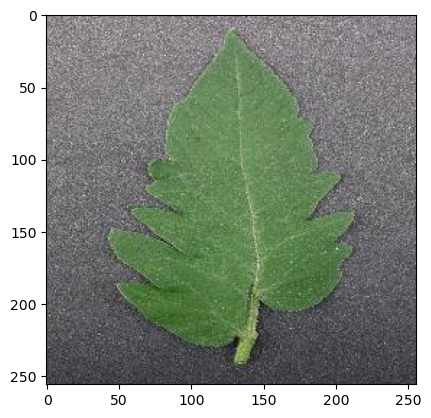

In [107]:
plt.imshow(plt.imread(Tomato_healthy[0]))

## Read image data from all files and store it in a variable, Store the label as well

In [110]:
image = []
label = []

for i in Tomato_healthy:
    img = plt.imread(i)
    image.append(img)
    label.append(0)
    
for i in Tomato__Tomato_mosaic_virus :
    img = plt.imread(i)
    image.append(img)
    label.append(1)
    
for i in Tomato__Tomato_YellowLeaf__Curl_Virus:
    img = plt.imread(i)
    image.append(img)
    label.append(2)
    
for i in Tomato__Target_Spot:
    img = plt.imread(i)
    image.append(img)
    label.append(3)

for i in Tomato_Spider_mites_Two_spotted_spider_mite:
    img = plt.imread(i)
    image.append(img)
    label.append(4)
    
for i in Tomato_Septoria_leaf_spot:
    img = plt.imread(i)
    image.append(img)
    label.append(5)
    
for i in Tomato_Leaf_Mold:
    img = plt.imread(i)
    image.append(img)
    label.append(6)
    
for i in Tomato_Late_blight:
    img = plt.imread(i)
    image.append(img)
    label.append(7)



for i in Tomato_Early_blight:
    img = plt.imread(i)
    image.append(img)
    label.append(8)
    
for i in Tomato_Bacterial_spot:
    img = plt.imread(i)
    image.append(img)
    label.append(9)
    
for i in Potato___healthy:
    img = plt.imread(i)
    image.append(img)
    label.append(10)
    
for i in Potato___Late_blight:
    img = plt.imread(i)
    image.append(img)
    label.append(11)



for i in Potato___Early_blight:
    img = plt.imread(i)
    image.append(img)
    label.append(12)
    
for i in Pepper__bell___healthy:
    img = plt.imread(i)
    image.append(img)
    label.append(13)
    
for i in Pepper__bell___Bacterial_spot:
    img = plt.imread(i)
    image.append(img)
    label.append(14)

 

## Storelabel value-name in a dictionary

In [113]:
label_names={0:'Tomato_healthy',1:'Tomato__Tomato_mosaic_virus ',2:'Tomato__Tomato_YellowLeaf__Curl_Virus',3:'Tomato__Target_Spot',
             4:'Tomato_Spider_mites_Two_spotted_spider_mite',5:'Tomato_Septoria_leaf_spot',6:'Tomato_Leaf_Mold',
             7:'Tomato_Late_blight',8:'Tomato_Early_blight',9:'Tomato_Bacterial_spot',10:'Potato___healthy',11:'Potato___Late_blight',
             12:'Potato___Early_blight',13:'Pepper__bell___healthy',14:'Pepper__bell___Bacterial_spot'}

## Plot some of the images

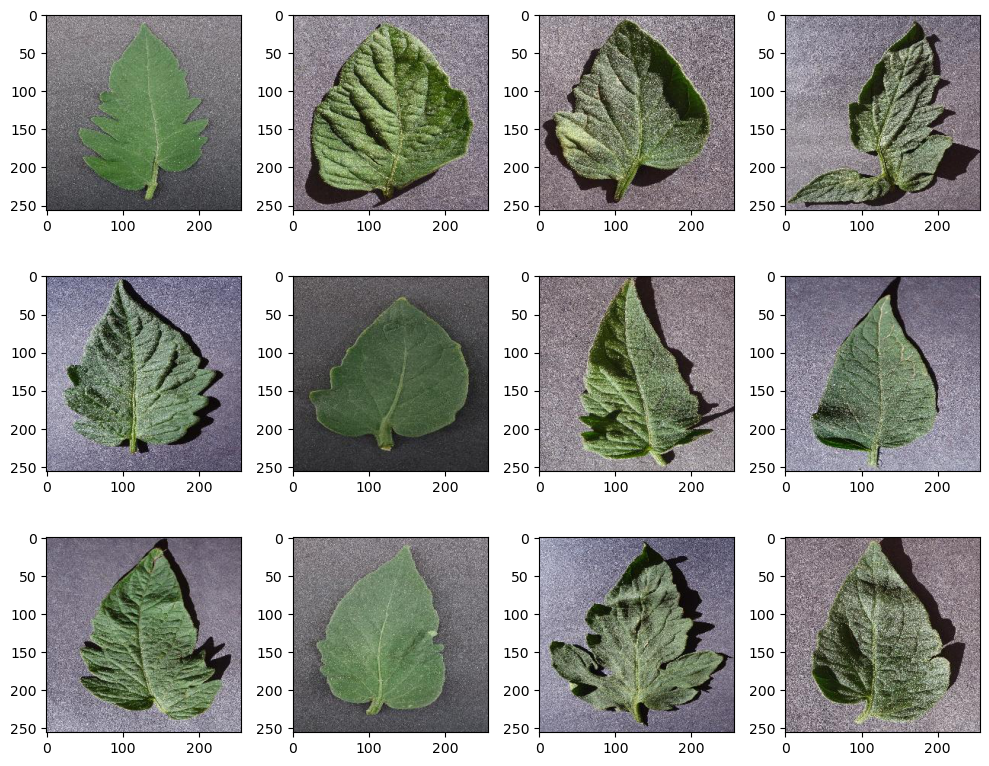

In [116]:
plt.figure(figsize = (10,8))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(image[i])
plt.tight_layout()

## Shuffle images and labels

In [118]:
image, label = shuffle(image, label)

## Plot the images once again

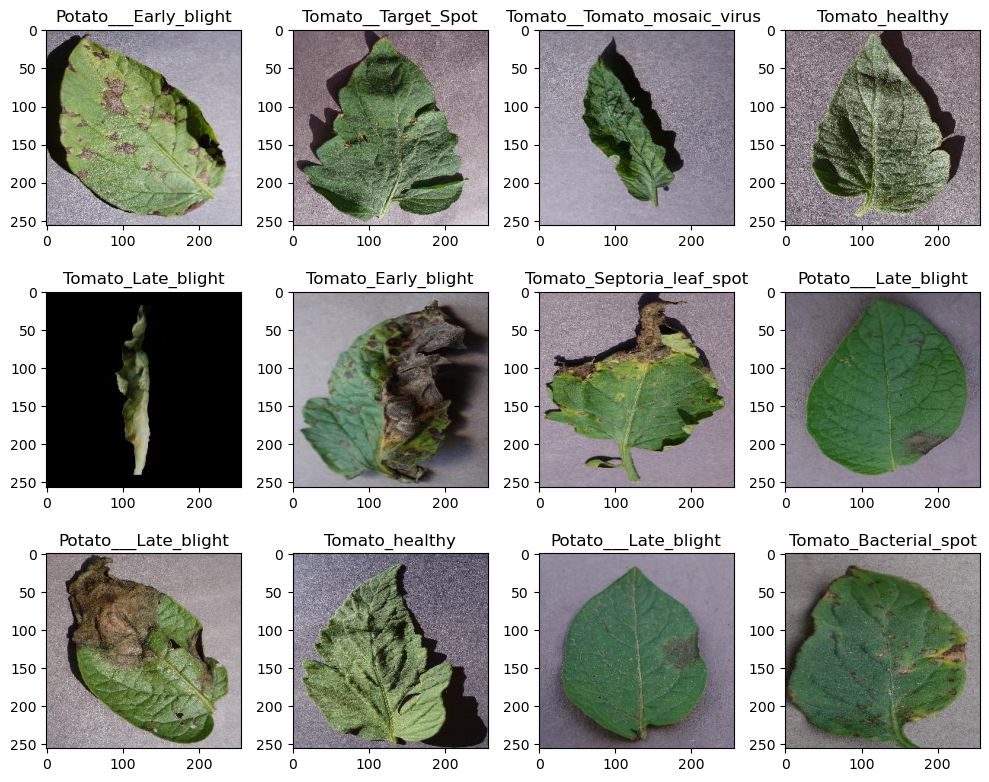

In [120]:
plt.figure(figsize = (10,8))
for i in range(12):
    plt.subplot(3,4,i+1)
    plt.imshow(image[i])
    plt.title(label_names[label[i]])
plt.tight_layout()

## Check the shape of some of the images

In [122]:
for i in range(15):
    print(image[i].shape)

(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)
(256, 256, 3)


## Resize all the images to a same height and width

In [124]:
X = []

for i in image:
    X.append(resize(i, (250,250,3)))

In [125]:
for i in range(15):
    print(X[i].shape)

(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)
(250, 250, 3)


## Convert images and labels to numpy array and store them as X and y variables

In [127]:
X = np.array(X)

In [130]:
y = np.array(label)

In [131]:
X.shape

(300, 250, 250, 3)

## Reshape the images to 1 dimension

In [133]:
d1, d2, d3, d4 = X.shape

In [134]:
X = X.reshape((d1, d2*d3*d4))

## Train test Split

In [136]:
from sklearn.model_selection import train_test_split

In [139]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

## Create SVM Model and train it

In [141]:
from sklearn.svm import SVC

In [142]:
model = SVC()

In [143]:
%time model.fit(X_train, y_train)

CPU times: total: 1min 2s
Wall time: 17.9 s


SVC()

## Make predictions with X_test

In [145]:
%time y_pred = model.predict(X_test)

CPU times: total: 1min 6s
Wall time: 18 s


## Evaluate the model

In [147]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [148]:
accuracy_score(y_test,y_pred)

0.36666666666666664

<Axes: >

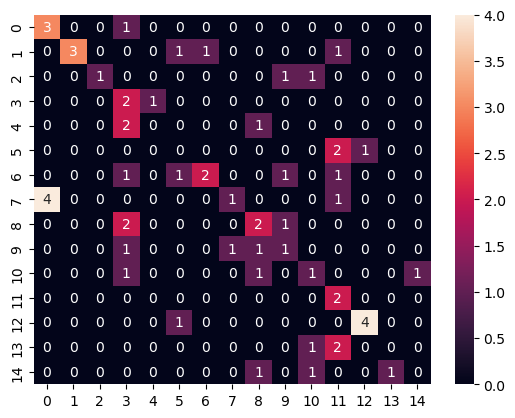

In [149]:
sns.heatmap(confusion_matrix(y_test,y_pred), annot = True)

In [150]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.43      0.75      0.55         4
           1       1.00      0.50      0.67         6
           2       1.00      0.33      0.50         3
           3       0.20      0.67      0.31         3
           4       0.00      0.00      0.00         3
           5       0.00      0.00      0.00         3
           6       0.67      0.33      0.44         6
           7       0.50      0.17      0.25         6
           8       0.33      0.40      0.36         5
           9       0.25      0.25      0.25         4
          10       0.25      0.25      0.25         4
          11       0.22      1.00      0.36         2
          12       0.80      0.80      0.80         5
          13       0.00      0.00      0.00         3
          14       0.00      0.00      0.00         3

    accuracy                           0.37        60
   macro avg       0.38      0.36      0.32        60
weighted avg       0.44   